In [1]:
import math

# CORRECT DATA from the image:
# x: [1, 2, 3] have y=0; x: [4, 5, 9] have y=1
x_data = [1, 2, 3, 4, 5, 9]
y_data = [0, 0, 0, 1, 1, 1]

def sigmoid(z):
    return 1 / (1 + math.exp(-z))


# Perform Predictions
def predict(x, w, b):
    yhat = sigmoid(w * x + b)
    print(f"Predicted probability for x={x}: {yhat}")

    return 1 if yhat >= 0.5 else 0


def loss_function(y, yhat):
    # Binary cross-entropy loss
    epsilon = 1e-15  # to avoid log(0)
    # Clip predictions to prevent log(0) and log(1-1)
    yhat = [max(min(yh, 1 - epsilon), epsilon) for yh in yhat]
    # Loss formula: -1/N * sum(y*log(yhat) + (1-y)*log(1-yhat))
    loss = -sum(yi * math.log(yh) + (1 - yi) * math.log(1 - yh) for yi, yh in zip(y, yhat)) / len(y)
    return loss

def gradient_descent(x, y, w, b, learning_rate=0.1, epochs=6):
    N = len(x)
    for _ in range(epochs):
        print(f"Epoch {_+1}")
        # 1. Calculate prediction (yhat)
        yhat = [sigmoid(w * xi + b) for xi in x]

        # 2. Compute gradients (dw and db)
        # Note: The gradient formulas given are already divided by N
        dw = sum((yh - yi) * xi for xi, yi, yh in zip(x, y, yhat)) / N
        db = sum(yh - yi for yi, yh in zip(y, yhat)) / N
        print(f"dw: {dw}, db: {db}")

        # 3. Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db
        print(f"Updated w: {w}, b: {b} \n")

        prediction = predict(5, w, b)
        print(f"Prediction for x=5: {prediction}\n")

    return w, b

# Initialize parameters
w = 0.0
b = 0.0

# Train the model with corrected data
w_final, b_final = gradient_descent(x_data, y_data, w, b)

# Compute final loss
yhat_final = [sigmoid(w_final * xi + b_final) for xi in x_data]
final_loss = loss_function(y_data, yhat_final)

print("Final weights (w, b):", w_final, b_final)
print("Final loss:", final_loss)


# Test predictions with final parameters
test_points = [5]
for point in test_points:
    prediction = predict(point, w_final, b_final)
    print(f"Prediction for x={point}: {prediction}")


Epoch 1
dw: -1.0, db: 0.0
Updated w: 0.1, b: 0.0 

Predicted probability for x=5: 0.6224593312018546
Prediction for x=5: 1

Epoch 2
dw: -0.4577387412295018, db: 0.09689203259039793
Updated w: 0.14577387412295018, b: -0.009689203259039793 

Predicted probability for x=5: 0.6724264587896644
Prediction for x=5: 1

Epoch 3
dw: -0.2523026899328927, db: 0.1345786191026865
Updated w: 0.17100414311623946, b: -0.023147065169308444 

Predicted probability for x=5: 0.6967509575362525
Prediction for x=5: 1

Epoch 4
dw: -0.15730256362978465, db: 0.15202627113650488
Updated w: 0.18673439947921794, b: -0.03834969228295893 

Predicted probability for x=5: 0.7099872871693736
Prediction for x=5: 1

Epoch 5
dw: -0.10722452100483355, db: 0.160922051048512
Updated w: 0.1974568515797013, b: -0.054441897387810134 

Predicted probability for x=5: 0.7176515828523862
Prediction for x=5: 1

Epoch 6
dw: -0.0788753521436281, db: 0.16557307354512132
Updated w: 0.2053443867940641, b: -0.07099920474232227 

Predicted

In [2]:
x = []

z = 0.5*10 + -0.75*5 + -1.0
# sigmoid
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

# tanh
def tanh(z):
    return math.tanh(z)

# ReLU
def relu(z):
    return max(0, z)

predictions = []
print("Sigmoid output for z=0.5*10 + -0.75*5 + -1.0:", sigmoid(z))
predictions.append(sigmoid(z))
print("Tanh output for z=0.5*10 + -0.75*5 + -1.0:", tanh(z))
predictions.append(tanh(z))
print("ReLU output for z=0.5*10 + -0.75*5 + -1.0:", relu(z))
predictions.append(relu(z))

def filter_prediction(values):
    return ["Pass" if v >= 0.5 else "Fail" for v in values]

filtered_predictions = filter_prediction(predictions)
print("Filtered predictions (>=0.5):", filtered_predictions)

Sigmoid output for z=0.5*10 + -0.75*5 + -1.0: 0.5621765008857981
Tanh output for z=0.5*10 + -0.75*5 + -1.0: 0.24491866240370913
ReLU output for z=0.5*10 + -0.75*5 + -1.0: 0.25
Filtered predictions (>=0.5): ['Pass', 'Fail', 'Fail']


In [ ]:
import math

# 1. Define the input data from the image
# Hours of study (x) for Student IDs 1 through 5
student_hours = [4, 2, 0, 1, 5]
student_ids = [1, 2, 3, 4, 5]

# Placeholder weights (These are just examples, as the true w and b
# for the plotted curve are not provided, but they define the model).
# We'll use values that produce a curve roughly centered around x=3
# Let's assume w = 1.0 and b = -3.0 (This makes z=0 when x=3)
W = 1.0  # Weight (slope)
B = -3.0 # Bias (intercept)
THRESHOLD = 0.5 # Threshold shown in the image

# 2. Sigmoid Activation Function (for Logistic Regression)
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

# 3. Main Prediction and Filtering Function
def predict_and_filter(student_ids, hours, W, B, threshold=0.5):
    """
    Calculates the passing probability for each student using Logistic Regression
    (sigmoid function) and filters the result based on a threshold.
    """
    results = []

    # Iterate over each student's data
    for student_id, x in zip(student_ids, hours):
        # 3a. Calculate the Linear Score (z)
        z = W * x + B

        # 3b. Calculate the Predicted Probability (yhat)
        yhat = sigmoid(z)

        # 3c. Filter the prediction (Pass/Fail)
        prediction = "Pass" if yhat >= threshold else "Fail"

        results.append({
            "Student ID": student_id,
            "Hours Studied (x)": x,
            "Probability (yhat)": f"{yhat:.4f}",
            "Prediction": prediction
        })

    return results

# 4. Run the function
print("--- Logistic Regression Prediction Results ---")
filtered_results = predict_and_filter(student_ids, student_hours, W, B, THRESHOLD)

# 5. Display the results in a clear format
print(f"Model Parameters: W={W}, B={B}")
print(f"Passing Threshold: {THRESHOLD}\n")

print("| Student ID | Hours (x) | Probability (yhat) | Result |")
print("|:----------:|:---------:|:------------------:|:------:|")
for result in filtered_results:
    print(f"| {result['Student ID']:^10} | {result['Hours Studied (x)']:^9} | {result['Probability (yhat)']:^18} | {result['Prediction']:^6} |")

--- Logistic Regression Prediction Results ---
Model Parameters: W=1.0, B=-3.0
Passing Threshold: 0.5

| Student ID | Hours (x) | Probability (yhat) | Result |
|:----------:|:---------:|:------------------:|:------:|
|     1      |     4     |       0.7311       |  Pass  |
|     2      |     2     |       0.2689       |  Fail  |
|     3      |     0     |       0.0474       |  Fail  |
|     4      |     1     |       0.1192       |  Fail  |
|     5      |     5     |       0.8808       |  Pass  |


### MLP
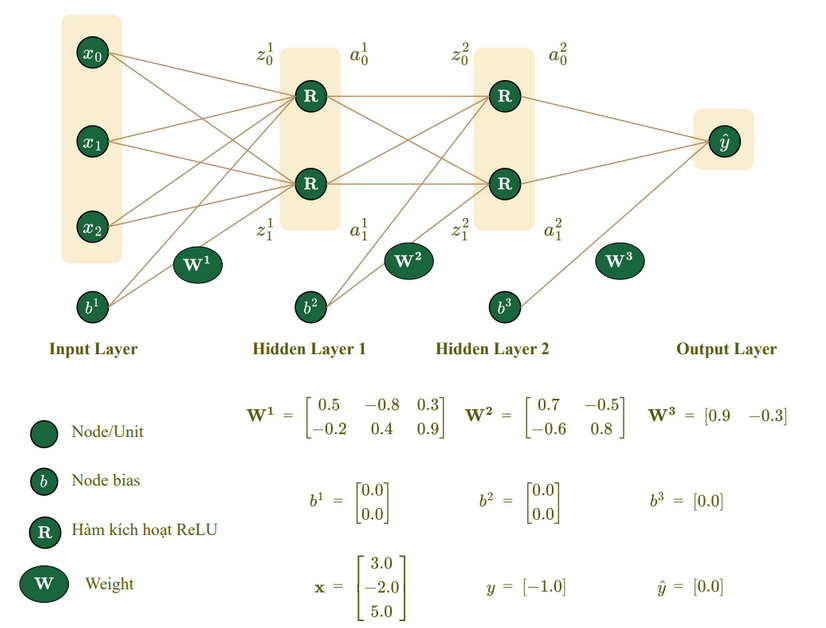

In [4]:
import math

ej = [4.6, 3.1]
def softmax(values):
    exp_values = [math.exp(v) for v in values]
    sum_exp = sum(exp_values)
    return [e / sum_exp for e in exp_values]

softmax_ej = softmax(ej)
print("Softmax for ej:", softmax_ej)

Softmax for ej: [0.8175744761936437, 0.1824255238063564]


In [5]:
import numpy as np

# Set print options for rounding to 2 decimal places
np.set_printoptions(precision=2, suppress=True)
ROUND_DECIMALS = 2
LEARNING_RATE = 0.10 # Assuming a small learning rate for the update step

# --- Activation Functions ---

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

# --- The Neural Network Class ---
save_y = []


class SimpleNN:
    def __init__(self, W1, b1, W2, b2, W3, b3):
        # Initial parameters (W: Weights, b: Biases)
        self.W1 = W1
        self.b1 = b1
        self.W2 = W2
        self.b2 = b2
        self.W3 = W3
        self.b3 = b3

    def forward_pass(self, x):

        # --- Layer 1 (Hidden Layer 1) ---
        # z1 = W1 * x + b1
        z1 = np.dot(self.W1, x) + self.b1
        z1 = np.round(z1, ROUND_DECIMALS)

        # a1 = ReLU(z1)
        a1 = relu(z1)

        # --- Layer 2 (Hidden Layer 2) ---
        # z2 = W2 * a1 + b2
        z2 = np.dot(self.W2, a1) + self.b2
        z2 = np.round(z2, ROUND_DECIMALS)

        # a2 = ReLU(z2)
        a2 = relu(z2)

        # --- Layer 3 (Output Layer) ---
        # z3 = W3 * a2 + b3 (Since it's a single output, W3 is 1x2 and b3 is scalar/1x1)
        z3 = np.dot(self.W3, a2) + self.b3
        z3 = np.round(z3, ROUND_DECIMALS)

        # a3 (y_hat) = z3 (Linear Activation)
        y_hat = z3

        # Store intermediate results for backpropagation
        self.cache = (x, z1, a1, z2, a2, z3, y_hat)

        print("\n--- FORWARD PASS (Initial Calculation) ---")
        print(f"Input x:\n{x.flatten()}")
        print("-" * 35)
        print(f"Layer 1 (Input x):\n{x.flatten()}")
        print(f"z1 = W1x + b1:\n{z1.flatten()}")
        print(f"a1 = ReLU(z1):\n{a1.flatten()}")
        print("-" * 35)
        print(f"Layer 2 (Input a1):\n{a1.flatten()}")
        print(f"z2 = W2a1 + b2:\n{z2.flatten()}")
        print(f"a2 = ReLU(z2):\n{a2.flatten()}")
        print("-" * 35)
        print(f"Output Layer (Input a2):\n{a2.flatten()}")
        print(f"z3 = W3a2 + b3:\n{z3.flatten()}")
        print(f"Predicted Output y_hat:\n{y_hat.flatten()}")
        print("-" * 35)

        save_y.append(y_hat.flatten()[0])
        return y_hat

    def calculate_loss(self, y_hat, y_true):
        # L = 1/3 * (y_hat - y_true)^2
        # Note: 1/3 is a constant and won't affect the sign of the gradient,
        # but we use it for accurate loss calculation as per the prompt.
        loss = (1/3.0) * np.sum((y_hat - y_true)**2)
        loss = np.round(loss, ROUND_DECIMALS)
        print(f"True y: {y_true.flatten()} | Predicted y_hat: {y_hat.flatten()}")
        print(f"Initial MSE Loss (L): {loss}")
        print("=" * 40)
        return loss

    def backward_pass(self, y_true, learning_rate):

        x, z1, a1, z2, a2, z3, y_hat = self.cache

        # Initialize gradient storage
        dW3, db3, dW2, db2, dW1, db1 = None, None, None, None, None, None

        print("\n--- BACKWARD PASS (Gradient Calculation) ---")

        # --- Layer 3 (Output Layer) ---
        # dL/dy_hat
        # dL/da3 = dL/dy_hat = 2/3 * (y_hat - y_true)
        dL_da3 = (2/3.0) * (y_hat - y_true)
        dL_da3 = np.round(dL_da3, ROUND_DECIMALS)

        # da3/dz3 = 1 (Linear activation derivative)

        # dL/dz3 = dL/da3 * da3/dz3
        dL_dz3 = dL_da3

        # dL/db3 = dL/dz3
        db3 = dL_dz3

        # dL/dW3 = dL/dz3 * a2^T
        # W3: 1x2, dL/dz3: 1x1, a2: 2x1 -> dW3: 1x2
        dW3 = np.dot(dL_dz3, a2.T)

        # dL/da2 = W3^T * dL/dz3
        # dL/da2: 2x1
        dL_da2 = np.dot(self.W3.T, dL_dz3)

        print(f"Output Layer Gradients (W3, b3):")
        print(f"dL/dW3:\n{np.round(dW3, ROUND_DECIMALS)}")
        print(f"dL/db3: {np.round(db3, ROUND_DECIMALS).flatten()}")
        print("-" * 35)

        # --- Layer 2 (Hidden Layer 2) ---
        # dL/dz2 = dL/da2 * ReLU'(z2)
        dL_dz2 = dL_da2 * relu_derivative(z2)
        dL_dz2 = np.round(dL_dz2, ROUND_DECIMALS)

        # dL/db2 = dL/dz2
        db2 = dL_dz2

        # dL/dW2 = dL/dz2 * a1^T
        # W2: 2x2, dL/dz2: 2x1, a1: 2x1 -> dW2: 2x2
        dW2 = np.dot(dL_dz2, a1.T)

        # dL/da1 = W2^T * dL/dz2
        # dL/da1: 2x1
        dL_da1 = np.dot(self.W2.T, dL_dz2)

        print(f"Hidden Layer 2 Gradients (W2, b2):")
        print(f"dL/dW2:\n{np.round(dW2, ROUND_DECIMALS)}")
        print(f"dL/db2:\n{np.round(db2, ROUND_DECIMALS).flatten()}")
        print("-" * 35)

        # --- Layer 1 (Hidden Layer 1) ---
        # dL/dz1 = dL/da1 * ReLU'(z1)
        dL_dz1 = dL_da1 * relu_derivative(z1)
        dL_dz1 = np.round(dL_dz1, ROUND_DECIMALS)

        # dL/db1 = dL/dz1
        db1 = dL_dz1


        # dL/dW1 = dL/dz1 * x^T
        # W1: 2x3, dL/dz1: 2x1, x: 3x1 -> dW1: 2x3
        dW1 = np.dot(dL_dz1, x.T)

        print(f"Hidden Layer 1 Gradients (W1, b1):")
        print(f"dL/dW1:\n{np.round(dW1, ROUND_DECIMALS)}")
        print(f"dL/db1:\n{np.round(db1, ROUND_DECIMALS).flatten()}")
        print("=" * 40)

        # --- Update Parameters ---
        self.W3_new = np.round(self.W3 - learning_rate * dW3, ROUND_DECIMALS)
        self.b3_new = np.round(self.b3 - learning_rate * db3, ROUND_DECIMALS)

        self.W2_new = np.round(self.W2 - learning_rate * dW2, ROUND_DECIMALS)
        self.b2_new = np.round(self.b2 - learning_rate * db2, ROUND_DECIMALS)

        self.W1_new = np.round(self.W1 - learning_rate * dW1, ROUND_DECIMALS)
        self.b1_new = np.round(self.b1 - learning_rate * db1, ROUND_DECIMALS)

        return dW1, db1, dW2, db2, dW3, db3

# --- Initializing Data and Model ---

# Data
X = np.array([[3.0], [-2.0], [5.0]]) # Input (3x1)
Y = np.array([[-1.0]])              # True output (1x1)

# Parameters (Matrices are explicitly defined as 2D NumPy arrays)
W1_init = np.array([[0.5, -0.8, 0.3], [-0.2, 0.4, 0.9]]) # 2x3
b1_init = np.array([[0.0], [0.0]])                       # 2x1

W2_init = np.array([[0.7, -0.5], [-0.6, 0.8]])           # 2x2
b2_init = np.array([[0.0], [0.0]])                       # 2x1

W3_init = np.array([[0.9, -0.3]])                        # 1x2
b3_init = np.array([[0.0]])                              # 1x1

# Create and train the model
nn = SimpleNN(W1_init, b1_init, W2_init, b2_init, W3_init, b3_init)

# --- EXECUTION ---

# 1. Forward Pass & Loss Calculation
y_hat = nn.forward_pass(X)
nn.calculate_loss(y_hat, Y)
save_y.append(y_hat.flatten()[0])
print(f"Initial Predicted Output y_hat:\n{y_hat.flatten()}")

# 2. Backward Pass & Parameter Update
nn.backward_pass(Y, LEARNING_RATE)
y_hat = nn.forward_pass(X)
save_y.append(y_hat.flatten()[0])
print(f"New Predicted Output after update y_hat:\n{y_hat.flatten()}")


# 3. Print Final Update
print(f"\n--- PARAMETERS BEFORE AND AFTER UPDATE (LR=0.1) ---")
print("\n## 🔹 Layer 3 (Output)")
print("W3 Before:\n", nn.W3)
print("W3 After:\n", nn.W3_new)
print("b3 Before:", nn.b3.flatten())
print("b3 After:", nn.b3_new.flatten())
print("-" * 35)

print("\n## 🔸 Layer 2 (Hidden)")
print("W2 Before:\n", nn.W2)
print("W2 After:\n", nn.W2_new)
print("b2 Before:", nn.b2.flatten())
print("b2 After:", nn.b2_new.flatten())
print("-" * 35)

print("\n## 🌟 Layer 1 (Hidden)")
print("W1 Before:\n", nn.W1)
print("W1 After:\n", nn.W1_new)
print("b1 Before:", nn.b1.flatten())
print("b1 After:", nn.b1_new.flatten())
print("-" * 35)


--- FORWARD PASS (Initial Calculation) ---
Input x:
[ 3. -2.  5.]
-----------------------------------
Layer 1 (Input x):
[ 3. -2.  5.]
z1 = W1x + b1:
[4.6 3.1]
a1 = ReLU(z1):
[4.6 3.1]
-----------------------------------
Layer 2 (Input a1):
[4.6 3.1]
z2 = W2a1 + b2:
[ 1.67 -0.28]
a2 = ReLU(z2):
[1.67 0.  ]
-----------------------------------
Output Layer (Input a2):
[1.67 0.  ]
z3 = W3a2 + b3:
[1.5]
Predicted Output y_hat:
[1.5]
-----------------------------------
True y: [-1.] | Predicted y_hat: [1.5]
Initial MSE Loss (L): 2.08
Initial Predicted Output y_hat:
[1.5]

--- BACKWARD PASS (Gradient Calculation) ---
Output Layer Gradients (W3, b3):
dL/dW3:
[[2.79 0.  ]]
dL/db3: [1.67]
-----------------------------------
Hidden Layer 2 Gradients (W2, b2):
dL/dW2:
[[6.9  4.65]
 [0.   0.  ]]
dL/db2:
[ 1.5 -0. ]
-----------------------------------
Hidden Layer 1 Gradients (W1, b1):
dL/dW1:
[[ 3.15 -2.1   5.25]
 [-2.25  1.5  -3.75]]
dL/db1:
[ 1.05 -0.75]

--- FORWARD PASS (Initial Calculation) 

In [6]:
print(save_y)

[np.float64(1.5), np.float64(1.5), np.float64(1.5), np.float64(1.5)]


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1, 3)
        self.fc.weight.data = torch.tensor([[1.0], [2.0], [-1.0]])
        self.fc.bias.data = torch.tensor([1.0, 1.0, 1.0])

    def forward(self, x):
        logits = self.fc(x)
        probs = F.softmax(logits, dim=1)
        print(probs)
        return probs

x = torch.tensor([[1.0]])
model = SimpleModel()

In [8]:
output = model(x)
print("Output probabilities:", output.detach().numpy())

tensor([[0.2595, 0.7054, 0.0351]], grad_fn=<SoftmaxBackward0>)
Output probabilities: [[0.26 0.71 0.04]]


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import random

# Thiết lập Seed
np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

# layer = nn.Linear(2,3)
# layer.weight.data = torch.tensor([[0.3, 0.2], [1.0, -1.25], [-1.5, 0.25]])
# layer.bias.data = torch.tensor([0.0, 0.0, 0.0])

# Định nghĩa Mô hình
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 3)
        # Hàm kích hoạt ReLU
        self.relu = nn.ReLU()

    def forward(self, x):
        h = self.linear(x)
        z = self.relu(h)
        # Đầu ra z (Logits)
        return z

# Khởi tạo mô hình
model = SimpleModel()

# Đầu vào X và Nhãn y (Giả định y=0)
X = torch.tensor([[3.0, 2.0]], dtype=torch.float32)
y = torch.tensor([0], dtype=torch.long) # Nhãn là chỉ số lớp 0

# 1. Forward Pass
z = model(X)

# 2. Tính toán Loss
loss_fn = nn.CrossEntropyLoss()
loss = loss_fn(z, y)

print(f"Logits (z): {z.detach().numpy()}")
print(f"Giá trị Loss: {loss.item():.4f}")

Logits (z): [[0.73 0.   0.  ]]
Giá trị Loss: 0.6755


In [15]:
import torch
import torch.nn as nn
import numpy as np
import random

# --- 1. Thiết lập Seed và Định nghĩa các Tham số ---

# Thiết lập Seed để đảm bảo tính toán nhất quán
np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

# Đầu vào X và Nhãn y
X = torch.tensor([[3.0, 2.0]], dtype=torch.float32)
y = torch.tensor([0], dtype=torch.long) # Nhãn là chỉ số lớp 0 (y0=1)

# --- 2. Định nghĩa Mô hình FullModel ---

class FullModel(nn.Module):
    def __init__(self, input_size=2, hidden_size=3, output_size=3):
        super().__init__()

        # Lớp 1: Input Layer -> Hidden Layer
        # Chiều vào: 2, Chiều ra: 3 (h0, h1, h2)
        # Sử dụng seed(0) để khởi tạo các tham số W_h và b_h
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU() # Hàm kích hoạt ReLU cho Hidden Layer

        # Lớp 2: Hidden Layer -> Output Layer (Logits)
        # Chiều vào: 3 (từ h), Chiều ra: 3 (z0, z1, z2)
        # CẦN KHỞI TẠO LỚP linear2 SAU KHI linear1 đã khởi tạo xong
        # (để đảm bảo linear1 nhận được các giá trị từ seed(0))
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Forward Lớp 1
        h_raw = self.linear1(x) # Tính toán W_h * X + b_h
        h = self.relu(h_raw)    # Áp dụng ReLU

        # Forward Lớp 2
        z = self.linear2(h)     # Tính toán W_z * h + b_z

        # Đầu ra z là Logits, sẵn sàng cho CrossEntropyLoss
        return z

# --- 3. Khởi tạo và Tính toán Forward Pass ---

# Khởi tạo mô hình
model = FullModel()


# 1. Forward Pass
z = model(X)

# 2. Tính toán Loss
loss_fn = nn.CrossEntropyLoss()
loss = loss_fn(z, y)

print("--- Kết quả tính toán FullModel ---")
print(f"Đầu vào Logits (z): {z.detach().numpy()}")
print(f"Giá trị Loss (Cross-Entropy): {loss.item():.4f}")
print("-" * 35)

# Kiểm tra các tham số
print("\nTham số Lớp 1:")
print(f"W_h:\n{model.linear1.weight.data}")
print(f"b_h:\n{model.linear1.bias.data}")
print("\nTham số Lớp 2:")
print(f"W_z:\n{model.linear2.weight.data}")
print(f"b_z:\n{model.linear2.bias.data}")

--- Kết quả tính toán FullModel ---
Đầu vào Logits (z): [[-0.28 -0.65  0.23]]
Giá trị Loss (Cross-Entropy): 1.2078
-----------------------------------

Tham số Lớp 1:
W_h:
tensor([[-0.0053,  0.3793],
        [-0.5820, -0.5204],
        [-0.2723,  0.1896]])
b_h:
tensor([-0.0140,  0.5607, -0.0628])

Tham số Lớp 2:
W_z:
tensor([[ 0.1528, -0.1745, -0.1135],
        [-0.5516, -0.3824, -0.2380],
        [ 0.0214,  0.2282,  0.3464]])
b_z:
tensor([-0.3914, -0.2514,  0.2097])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random

# Thiết lập Seed (chỉ để giữ lại cấu trúc, không ảnh hưởng đến giá trị W, b)
np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

# Đầu vào X và Nhãn y
X = torch.tensor([[3.0, 2.0]], dtype=torch.float32)
y = torch.tensor([0], dtype=torch.long) # Nhãn là chỉ số lớp 0 (y0=1)

# --- 3. Định nghĩa Mô hình FullModel với Trọng số TỰ GÁN ---

class FullModel(nn.Module):
    def __init__(self, input_size=2, hidden_size=2, output_size=3): # hidden_size=2 để khớp với W_h 2x2
        super().__init__()

        # Lớp 1: Input Layer -> Hidden Layer (2 -> 2)
        self.linear1 = nn.Linear(input_size, hidden_size)

        # Gán trọng số và bias TỪ SƠ ĐỒ GỐC
        self.linear1.weight.data = torch.tensor([[0.8, 0.4], [-1.0, -0.6]], dtype=torch.float32) # Dạng (out_features, in_features)
        self.linear1.bias.data = torch.tensor([0.0, 0.0], dtype=torch.float32)

        self.relu = nn.ReLU()

        # Lớp 2: Hidden Layer -> Output Layer (2 -> 3)
        self.linear2 = nn.Linear(hidden_size, output_size)

        # Gán trọng số và bias TỪ SƠ ĐỒ GỐC
        self.linear2.weight.data = torch.tensor([[0.3, -0.4], [0.2, -1.0], [0.1, 0.2]], dtype=torch.float32) # Dạng (out_features, in_features)
        self.linear2.bias.data = torch.tensor([0.0, 0.0, 0.0], dtype=torch.float32)


    def forward(self, x):
        h_raw = self.linear1(x)
        h = self.relu(h_raw)
        z = self.linear2(h)
        return z

# --- 4. Khởi tạo và Tính toán Forward Pass ---

model = FullModel()

# 1. Forward Pass
z = model(X)

# 2. Tính toán Loss
loss_fn = nn.CrossEntropyLoss()
loss = loss_fn(z, y)

print("--- Kết quả tính toán FullModel với Trọng số TỰ GÁN ---")
print(f"Logits (z): {z.detach().numpy()}")
print(f"Giá trị Loss (Cross-Entropy): {loss.item():.4f}")

--- Kết quả tính toán FullModel với Trọng số TỰ GÁN ---
Logits (z): [[0.96 0.64 0.32]]
Giá trị Loss (Cross-Entropy): 0.8125
